# Pandas

In [1]:
%pip install pandas

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.2/11.3 MB 6.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.3 MB 7.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.3 MB 9.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.3 MB 9.6 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/11.3 MB 10.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/11.3 MB 10.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.3/11.3 MB 10.7 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.3 MB 10.9 MB/s eta 0:00:01
   --------------- ------------------------ 4.5/11.3 MB 11.0 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.3 MB 11.0 MB/s eta 0:00:01
   ------------------ --------------------- 5.4/11.3 MB 10.7 MB/s eta 0:00:01
   -------------------- ------------------- 5.7/11.3 MB 10.5 MB/s eta 0:00:0


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [4]:
pd.__version__

'2.3.3'

In [14]:
df = pd.read_csv('heroes.csv')

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
#지수가 아니라 실수 처리

In [16]:
df.sample(5)   # 랜덤하게 몇개 행만
df.head(1)    # 위에서 1개만
df.tail(1)    # 아래에서 1개만

,이름,나이,직업,국적,키,재산
0,아이언맨,58,CEO,미국,174,11500000000


In [18]:
df.info()

# object : 문자형 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      7 non-null      object 
 1   나이      7 non-null      int64  
 2   직업      7 non-null      object 
 3   국적      7 non-null      object 
 4   키       7 non-null      int64  
 5   재산      5 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.0+ bytes


In [21]:
df.describe()  #데이터에 있는 전반적인 사항 및 특이사항 파악

,나이,키,재산
count,7,7,5
mean,34,190,2578000120
std,13,36,5003440739
min,18,170,600
25%,26,172,50000000
50%,32,177,340000000
75%,39,184,1000000000
max,58,270,11500000000


In [22]:
df.head()

,이름,나이,직업,국적,키,재산
0,아이언맨,58,CEO,미국,174,11500000000
1,토르,45,신,아스가르드,190,NaN
2,스파이더맨,18,고등학생,미국,177,600
3,원더우먼,27,공주,데미스키라,178,NaN
4,헐크,33,핵물리학자,미국,270,1000000000


In [24]:
df['국적']
df['국적'].unique

<bound method Series.unique of 0       미국
1    아스가르드
2       미국
3    데미스키라
4       미국
5       미국
6      러시아
Name: 국적, dtype: object>

In [32]:
df['나이'].nsmallest()
df['나이'].nlargest()

0    58
1    45
4    33
6    32
3    27
Name: 나이, dtype: int64

In [37]:
#데이터 슬라이싱
df['이름'][:4]


0     아이언맨
1       토르
2    스파이더맨
3     원더우먼
Name: 이름, dtype: object

In [36]:
df[:3]
df[4:]

,이름,나이,직업,국적,키,재산
4,헐크,33,핵물리학자,미국,270,1000000000
5,캡틴마블,25,파일럿,미국,170,340000000
6,블랙위도우,32,스파이,러시아,170,50000000


In [38]:
df.loc[3,'이름']

'원더우먼'

In [39]:
df.loc[0:2,'이름':'직업']

,이름,나이,직업
0,아이언맨,58,CEO
1,토르,45,신
2,스파이더맨,18,고등학생


In [42]:
df.loc[0:2,['이름','직업']]

,이름,직업
0,아이언맨,CEO
1,토르,신
2,스파이더맨,고등학생


In [44]:
df

,이름,나이,직업,국적,키,재산
0,아이언맨,58,CEO,미국,174,11500000000
1,토르,45,신,아스가르드,190,NaN
2,스파이더맨,18,고등학생,미국,177,600
3,원더우먼,27,공주,데미스키라,178,NaN
4,헐크,33,핵물리학자,미국,270,1000000000
5,캡틴마블,25,파일럿,미국,170,340000000
6,블랙위도우,32,스파이,러시아,170,50000000


In [45]:
#미션 : 나이가 30초과, 50미만인 레코드만 추출해주세요
result = df[(df['나이'] > 30) & (df['나이'] < 50)]
result

,이름,나이,직업,국적,키,재산
1,토르,45,신,아스가르드,190,NaN
4,헐크,33,핵물리학자,미국,270,1000000000
6,블랙위도우,32,스파이,러시아,170,50000000


In [49]:
# 키가 180 이상인 이름과 나이 컬럼만 추출

result = df.loc[df['키'] > 180, ['이름', '나이']]

result

,이름,나이
1,토르,45
4,헐크,33


In [61]:
#컬럼 이름 바꾸기

df.columns = ['이름', '연령', '직업', '국적', '신장', '재산']
df

df.rename(columns = {'이름':'성명','연령':'나이'}, inplace=True)

In [62]:
df = df.rename(columns = {'이름':'성명','연령':'나이'})

In [63]:
# 원하는 열 버리기 drop

In [ ]:
#결측치 NaN 처리하기
df[df.isnull()]

#전체 행 날리기 df.dropna()
#특정 값으로 채우기
#1. 0으로 채우기
df['재산'].fillna(0)
#평균값으로 채우기 df['재산'].fillna(df['재산'].mean())

0   11500000000
1             0
2           600
3             0
4    1000000000
5     340000000
6      50000000
Name: 재산, dtype: float64

In [73]:
df.groupby('국적')['재산'].mean()

국적
데미스키라          NaN
러시아       50000000
미국      3210000150
아스가르드          NaN
Name: 재산, dtype: float64

In [117]:
# 미션
#sales_Data, user_data

##user data에서
# 컬럼명을 한글로 변경
    # '고객ID', '구매일자', '제품분류', '구매금액', '구매채널', '할인율'
    # '고객ID', '고객명', '가입지역'
# 구매금액이 10000원 이상인 데이터만 필터링
# '온라인' 채널에서 발생한 구매 중 5000원 이상인 것만 필터링
# '가전', '주방용품' 에 속하는 데이터만 필터링
# 각 열별 결측치 개수 확인
# 결측치가 있는 행 전체 삭제
# 특정 값으로 결측치 채우기

df = pd.read_csv('sales_data.csv')
user_df = pd.read_csv('user_data.csv')

In [118]:
pd.options.display.float_format = '{:.2f}'.format
df

,customer_id,order_date,product_category,amount,channel,discount_rate
0,C001,2025-09-01,가전,1200000,온라인,0.10
1,C002,2025-09-01,주방용품,45000,오프라인,0.05
2,C003,2025-09-02,식료품,12000,온라인,NaN
3,C001,2025-09-02,의류,89000,온라인,0.15
4,C004,2025-09-03,주방용품,21000,온라인,0.00
5,C002,2025-09-03,가전,2500000,오프라인,0.05
6,C005,2025-09-04,도서,9900,온라인,0.00
7,C003,2025-09-04,주방용품,62000,오프라인,NaN
8,C001,2025-09-05,식료품,8500,온라인,0.00
9,C004,2025-09-05,의류,150000,온라인,0.20


In [119]:
user_df

,customer_id,customer_name,region
0,C001,김민준,서울
1,C002,이서연,부산
2,C003,박도윤,인천
3,C004,최지우,서울
4,C005,정하은,광주


In [120]:
user_df.columns = ['고객ID', '고객명', '가입지역']
user_df

,고객ID,고객명,가입지역
0,C001,김민준,서울
1,C002,이서연,부산
2,C003,박도윤,인천
3,C004,최지우,서울
4,C005,정하은,광주


In [121]:
df.columns = ['고객ID', '구매일자', '제품분류', '구매금액', '구매채널', '할인율']
df

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율
0,C001,2025-09-01,가전,1200000,온라인,0.10
1,C002,2025-09-01,주방용품,45000,오프라인,0.05
2,C003,2025-09-02,식료품,12000,온라인,NaN
3,C001,2025-09-02,의류,89000,온라인,0.15
4,C004,2025-09-03,주방용품,21000,온라인,0.00
5,C002,2025-09-03,가전,2500000,오프라인,0.05
6,C005,2025-09-04,도서,9900,온라인,0.00
7,C003,2025-09-04,주방용품,62000,오프라인,NaN
8,C001,2025-09-05,식료품,8500,온라인,0.00
9,C004,2025-09-05,의류,150000,온라인,0.20


In [122]:
# 구매금액이 10000원 이상인 데이터만 필터링

result = df[df['구매금액']>10000]
result

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율
0,C001,2025-09-01,가전,1200000,온라인,0.10
1,C002,2025-09-01,주방용품,45000,오프라인,0.05
2,C003,2025-09-02,식료품,12000,온라인,NaN
3,C001,2025-09-02,의류,89000,온라인,0.15
4,C004,2025-09-03,주방용품,21000,온라인,0.00
5,C002,2025-09-03,가전,2500000,오프라인,0.05
7,C003,2025-09-04,주방용품,62000,오프라인,NaN
9,C004,2025-09-05,의류,150000,온라인,0.20


In [123]:
# '온라인' 채널에서 발생한 구매 중 5000원 이상인 것만 필터링

result = df[(df['구매채널']=='온라인')&(df['구매금액']>5000)]
result

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율
0,C001,2025-09-01,가전,1200000,온라인,0.10
2,C003,2025-09-02,식료품,12000,온라인,NaN
3,C001,2025-09-02,의류,89000,온라인,0.15
4,C004,2025-09-03,주방용품,21000,온라인,0.00
6,C005,2025-09-04,도서,9900,온라인,0.00
8,C001,2025-09-05,식료품,8500,온라인,0.00
9,C004,2025-09-05,의류,150000,온라인,0.20


In [124]:
# '가전', '주방용품' 에 속하는 데이터만 필터링

result = df[(df['제품분류']=='가전')+(df['제품분류']=='주방용품')]
result

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율
0,C001,2025-09-01,가전,1200000,온라인,0.10
1,C002,2025-09-01,주방용품,45000,오프라인,0.05
4,C004,2025-09-03,주방용품,21000,온라인,0.00
5,C002,2025-09-03,가전,2500000,오프라인,0.05
7,C003,2025-09-04,주방용품,62000,오프라인,NaN


In [125]:
# 각 열별 결측치 개수 확인

df[df.isnull()]


,고객ID,구매일자,제품분류,구매금액,구매채널,할인율
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# 결측치가 있는 행 전체 삭제

df.dropna()

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율
0,C001,2025-09-01,가전,1200000,온라인,0.10
1,C002,2025-09-01,주방용품,45000,오프라인,0.05
3,C001,2025-09-02,의류,89000,온라인,0.15
4,C004,2025-09-03,주방용품,21000,온라인,0.00
5,C002,2025-09-03,가전,2500000,오프라인,0.05
6,C005,2025-09-04,도서,9900,온라인,0.00
8,C001,2025-09-05,식료품,8500,온라인,0.00
9,C004,2025-09-05,의류,150000,온라인,0.20


In [128]:
# 특정 값으로 결측치 채우기

df.fillna(method = 'bfill')

C:\Users\EL36\AppData\Local\Temp\ipykernel_12888\4166679969.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'bfill')


,고객ID,구매일자,제품분류,구매금액,구매채널,할인율
0,C001,2025-09-01,가전,1200000,온라인,0.10
1,C002,2025-09-01,주방용품,45000,오프라인,0.05
2,C003,2025-09-02,식료품,12000,온라인,0.15
3,C001,2025-09-02,의류,89000,온라인,0.15
4,C004,2025-09-03,주방용품,21000,온라인,0.00
5,C002,2025-09-03,가전,2500000,오프라인,0.05
6,C005,2025-09-04,도서,9900,온라인,0.00
7,C003,2025-09-04,주방용품,62000,오프라인,0.00
8,C001,2025-09-05,식료품,8500,온라인,0.00
9,C004,2025-09-05,의류,150000,온라인,0.20


In [135]:
df['할인율'].fillna(0,inplace=True)
df

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,할인금액
0,C001,2025-09-01,가전,1200000,온라인,0.10,120000.00
1,C002,2025-09-01,주방용품,45000,오프라인,0.05,2250.00
2,C003,2025-09-02,식료품,12000,온라인,0.00,NaN
3,C001,2025-09-02,의류,89000,온라인,0.15,13350.00
4,C004,2025-09-03,주방용품,21000,온라인,0.00,0.00
5,C002,2025-09-03,가전,2500000,오프라인,0.05,125000.00
6,C005,2025-09-04,도서,9900,온라인,0.00,0.00
7,C003,2025-09-04,주방용품,62000,오프라인,0.00,NaN
8,C001,2025-09-05,식료품,8500,온라인,0.00,0.00
9,C004,2025-09-05,의류,150000,온라인,0.20,30000.00


In [136]:
# 기존 열을 이용해 새로운 열 생성 

df['할인금액'] = df['구매금액'] * df['할인율']
df

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,할인금액
0,C001,2025-09-01,가전,1200000,온라인,0.10,120000.00
1,C002,2025-09-01,주방용품,45000,오프라인,0.05,2250.00
2,C003,2025-09-02,식료품,12000,온라인,0.00,0.00
3,C001,2025-09-02,의류,89000,온라인,0.15,13350.00
4,C004,2025-09-03,주방용품,21000,온라인,0.00,0.00
5,C002,2025-09-03,가전,2500000,오프라인,0.05,125000.00
6,C005,2025-09-04,도서,9900,온라인,0.00,0.00
7,C003,2025-09-04,주방용품,62000,오프라인,0.00,0.00
8,C001,2025-09-05,식료품,8500,온라인,0.00,0.00
9,C004,2025-09-05,의류,150000,온라인,0.20,30000.00


In [100]:
# 할인률이 적용된 df['실구매금액'] 새롭게 생성

df['실구매금액'] = df['구매금액'] - df['구매금액'] * df['할인율']
df

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,할인금액,실구매금액
0,C001,2025-09-01,가전,1200000,온라인,0,120000,1080000
1,C002,2025-09-01,주방용품,45000,오프라인,0,2250,42750
2,C003,2025-09-02,식료품,12000,온라인,NaN,NaN,NaN
3,C001,2025-09-02,의류,89000,온라인,0,13350,75650
4,C004,2025-09-03,주방용품,21000,온라인,0,0,21000
5,C002,2025-09-03,가전,2500000,오프라인,0,125000,2375000
6,C005,2025-09-04,도서,9900,온라인,0,0,9900
7,C003,2025-09-04,주방용품,62000,오프라인,NaN,NaN,NaN
8,C001,2025-09-05,식료품,8500,온라인,0,0,8500
9,C004,2025-09-05,의류,150000,온라인,0,30000,120000


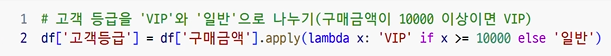

In [103]:
# 고객 등급을 'VIP'와 '일반'으로 나누기(구매금액이 10000 이상이면 VIP)

df['등급'] = '일반'          # 기본값
df.loc[df['구매금액'] >= 10000, '등급'] = 'VIP'
df

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,할인금액,실구매금액,등급
0,C001,2025-09-01,가전,1200000,온라인,0,120000,1080000,VIP
1,C002,2025-09-01,주방용품,45000,오프라인,0,2250,42750,VIP
2,C003,2025-09-02,식료품,12000,온라인,NaN,NaN,NaN,VIP
3,C001,2025-09-02,의류,89000,온라인,0,13350,75650,VIP
4,C004,2025-09-03,주방용품,21000,온라인,0,0,21000,VIP
5,C002,2025-09-03,가전,2500000,오프라인,0,125000,2375000,VIP
6,C005,2025-09-04,도서,9900,온라인,0,0,9900,일반
7,C003,2025-09-04,주방용품,62000,오프라인,NaN,NaN,NaN,VIP
8,C001,2025-09-05,식료품,8500,온라인,0,0,8500,일반
9,C004,2025-09-05,의류,150000,온라인,0,30000,120000,VIP


In [137]:
# 제품분류별 구매금액의 평균 구하기

## 처음 쓴 코드 df.groupby('제품분류':'구매금액').average

df.groupby('제품분류')['구매금액'].mean()

제품분류
가전     1850000.00
도서        9900.00
식료품      10250.00
의류      119500.00
주방용품     42666.67
Name: 구매금액, dtype: float64

In [138]:
# 구매채널별로 그룹화하여, 구매금액의 총합과 평균 동시 구하기

#처음쓴 코드
# result = {df.groupby('구매채널')['구매금액'].mean(),df.groupby('구매채널')['구매금액'].sum()}
# result

df.groupby('구매채널')['구매금액'].agg(['sum', 'mean'])


,sum,mean
구매채널,,
오프라인,2607000,869000.00
온라인,1490400,212914.29


In [141]:
merged_df = pd.merge(df,user_df,on='고객ID')
merged_df

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,할인금액,고객명,가입지역
0,C001,2025-09-01,가전,1200000,온라인,0.10,120000.00,김민준,서울
1,C002,2025-09-01,주방용품,45000,오프라인,0.05,2250.00,이서연,부산
2,C003,2025-09-02,식료품,12000,온라인,0.00,0.00,박도윤,인천
3,C001,2025-09-02,의류,89000,온라인,0.15,13350.00,김민준,서울
4,C004,2025-09-03,주방용품,21000,온라인,0.00,0.00,최지우,서울
5,C002,2025-09-03,가전,2500000,오프라인,0.05,125000.00,이서연,부산
6,C005,2025-09-04,도서,9900,온라인,0.00,0.00,정하은,광주
7,C003,2025-09-04,주방용품,62000,오프라인,0.00,0.00,박도윤,인천
8,C001,2025-09-05,식료품,8500,온라인,0.00,0.00,김민준,서울
9,C004,2025-09-05,의류,150000,온라인,0.20,30000.00,최지우,서울


In [ ]:
#csv로 저장하기
#index (행번호) False로 해두면 편함
#encoding 신경써두면 엑셀 호환성 높아짐

merged_df.to_csv('sales_report.csv', index=False, encoding='utf-8')

# Matplotlib
데이터 시각화

In [147]:
%pip install matplotlib

     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     -------------- ----------------------- 20.5/52.8 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 676.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/116.4 kB ? eta -:--:--
     -------------------------------------- 116.4/116.4 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB 10.2 MB/s eta 0:00:01
   ---- ----------------------------------- 0.8/8.1 MB 8.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/8.1 MB 9.4 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.1 MB 9.9 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.1 MB 10.0 MB/s eta 0:00:01
   ------------- -------------------------- 2.8/8.1 MB 10.1 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 10.2 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

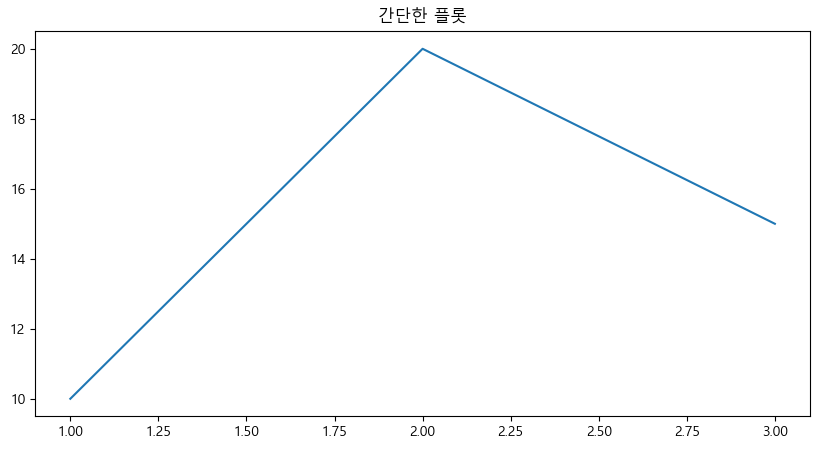

In [153]:
import pandas as pd

plt.figure(figsize=(10, 5))
plt.plot([1, 2, 3], [10, 20, 15])
plt.title('간단한 플롯')
plt.show()

#### 선그래프

In [156]:
# 선 그래프

plt.plot(x_data, y_data)

NameError: name 'x_data' is not defined

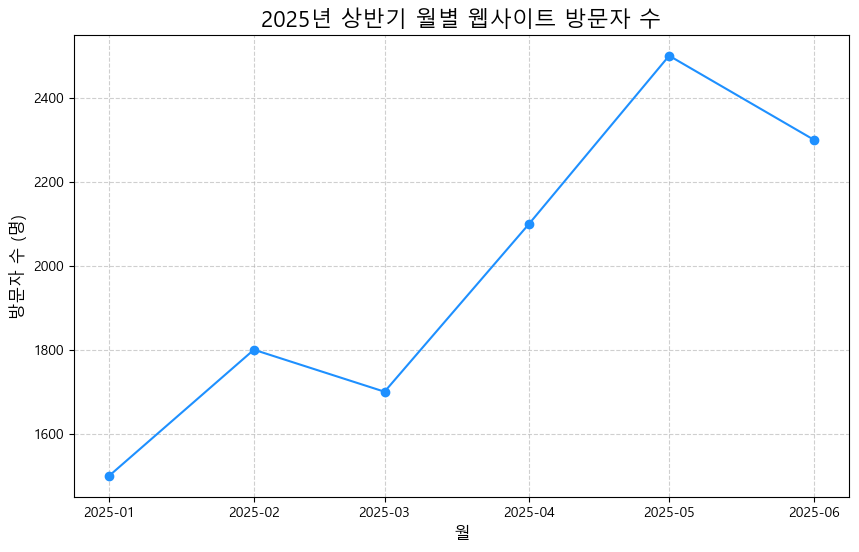

In [155]:
import matplotlib.pyplot as plt
import pandas as pd
 
# --- 데이터 생성---
data = {
    '월': pd.to_datetime(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01', '2025-06-01']),
    '방문자수': [1500, 1800, 1700, 2100, 2500, 2300]
}
df_line = pd.DataFrame(data)
 
plt.figure(figsize=(10, 6)) # figsize 설정
 
# 1. 플롯 그리기
plt.plot(
    df_line['월'],
    df_line['방문자수'],
    marker='o',
    linestyle='-',
    color='dodgerblue'
)
 
# 2. 그래프 꾸미기 (ax.set_ 대신 plt. 사용)
plt.title('2025년 상반기 월별 웹사이트 방문자 수', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('방문자 수 (명)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### 바 차트

In [157]:
plt.bar()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

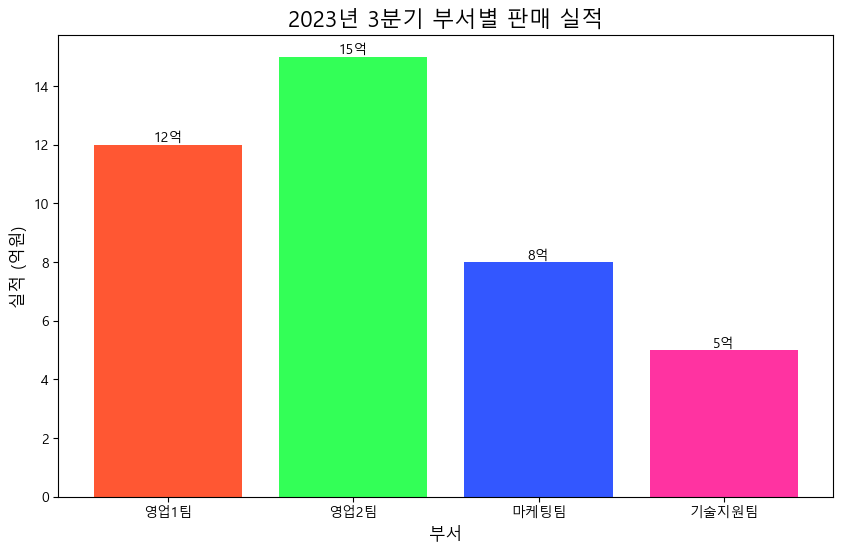

In [158]:
import matplotlib.pyplot as plt
import pandas as pd
 
data = {
    '부서': ['영업1팀', '영업2팀', '마케팅팀', '기술지원팀'],
    '실적(억원)': [12, 15, 8, 5]
}
df_bar = pd.DataFrame(data)
 
plt.figure(figsize=(10, 6))
 
bars = plt.bar(
    df_bar['부서'],
    df_bar['실적(억원)'],
    color=['#FF5733', '#33FF57', '#3357FF', '#FF33A1']
)
 
plt.title('2023년 3분기 부서별 판매 실적', fontsize=16)
plt.xlabel('부서', fontsize=12)
plt.ylabel('실적 (억원)', fontsize=12)
 
# 각 바 위에 실제 값 표시 (plt.text 사용)
for bar in bars:
    yval = bar.get_height()
    # plt.text(x좌표, y좌표, 내용, 정렬방식)
    plt.text(
        bar.get_x() + bar.get_width()/2.0,
        yval,
        f'{yval}억',
        va='bottom',
        ha='center'
    )
 
plt.show()
 

#### 산점도

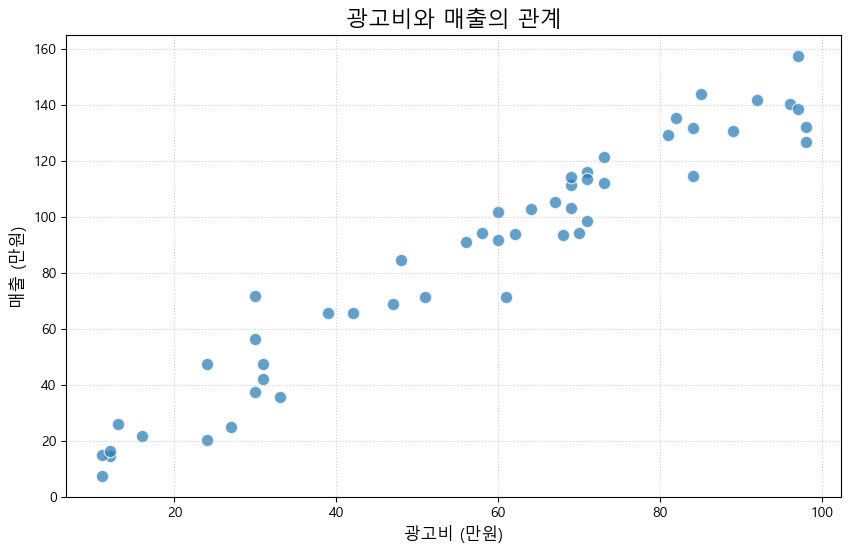

In [159]:
import matplotlib.pyplot as plt
import numpy as np
 
np.random.seed(42)
advertising_cost = np.random.randint(10, 100, 50)
sales = advertising_cost * 1.5 + np.random.normal(0, 10, 50)
 
plt.figure(figsize=(10, 6))
plt.scatter(
    advertising_cost,
    sales,
    alpha=0.7,
    edgecolors='w',
    s=80
)
 
plt.title('광고비와 매출의 관계', fontsize=16)
plt.xlabel('광고비 (만원)', fontsize=12)
plt.ylabel('매출 (만원)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
 
plt.show()

#### 히스토그램

어느 구간에 데이터가 몰려있나?

In [161]:
plt.hist()

TypeError: hist() missing 1 required positional argument: 'x'

#### 히트맵

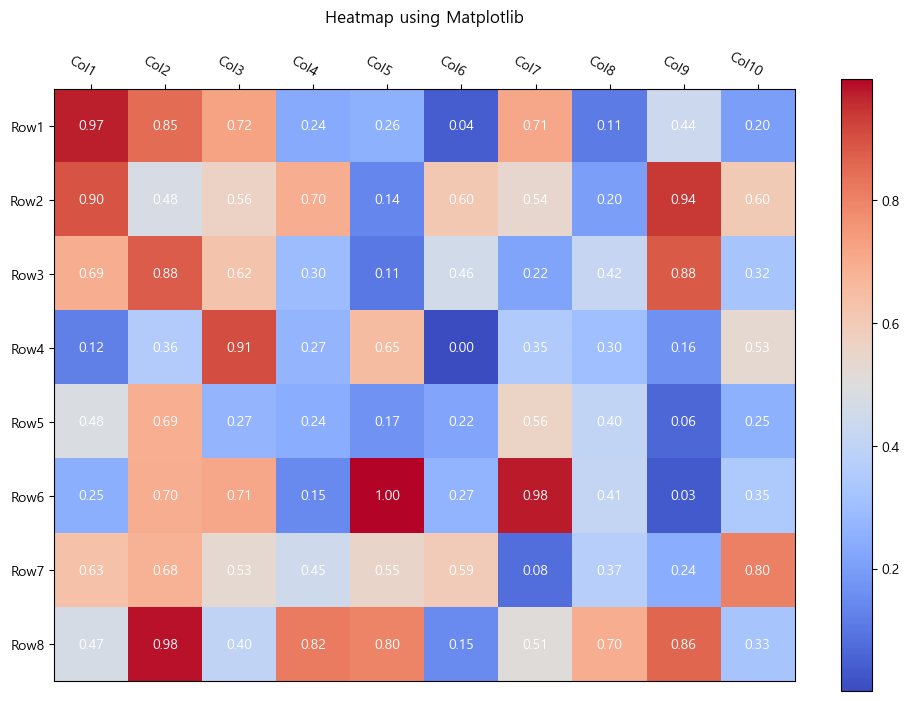

In [162]:
import matplotlib.pyplot as plt
import numpy as np
 
data = np.random.rand(8, 10)
rows = [f'Row{i+1}' for i in range(data.shape[0])]
cols = [f'Col{i+1}' for i in range(data.shape[1])]
 
plt.figure(figsize=(10, 7))
im = plt.imshow(data, cmap='coolwarm')
plt.colorbar(im)
plt.xticks(np.arange(data.shape[1]), labels=cols)
plt.yticks(np.arange(data.shape[0]), labels=rows)
plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.setp(plt.gca().get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
 
# 각 셀에 텍스트 추가 (Annotation)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        # plt.text(x, y, s) 순서입니다.
        plt.text(j, i, f'{data[i, j]:.2f}',
                 ha="center", va="center", color="w")
 
plt.title("Heatmap using Matplotlib", pad=20)
plt.tight_layout()
plt.show()
 

In [164]:
sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=cols, yticklabels=rows)
plt.show()

NameError: name 'sns' is not defined

In [165]:
sns.barplot(x=['A', 'B'], y=[10, 20])
plt.title("Seaborn Plot with Matplotlib Title")
plt.show()

NameError: name 'sns' is not defined

In [168]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


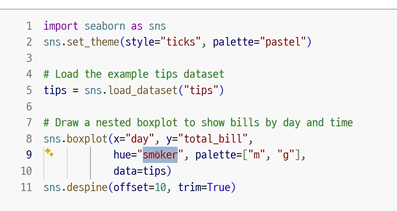

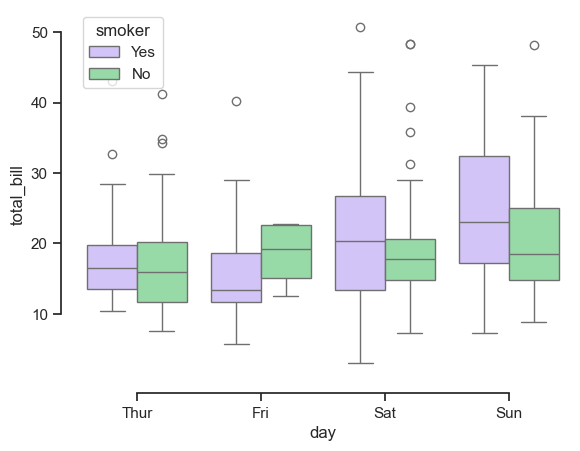

In [169]:
import seaborn as sns
sns.set_theme(style='ticks',palette='pastel')

#Load the example tips dataset
tips = sns.load_dataset('tips')

#Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker",palette=["m","g"],
            data=tips)
sns.despine(offset=10,trim=True)

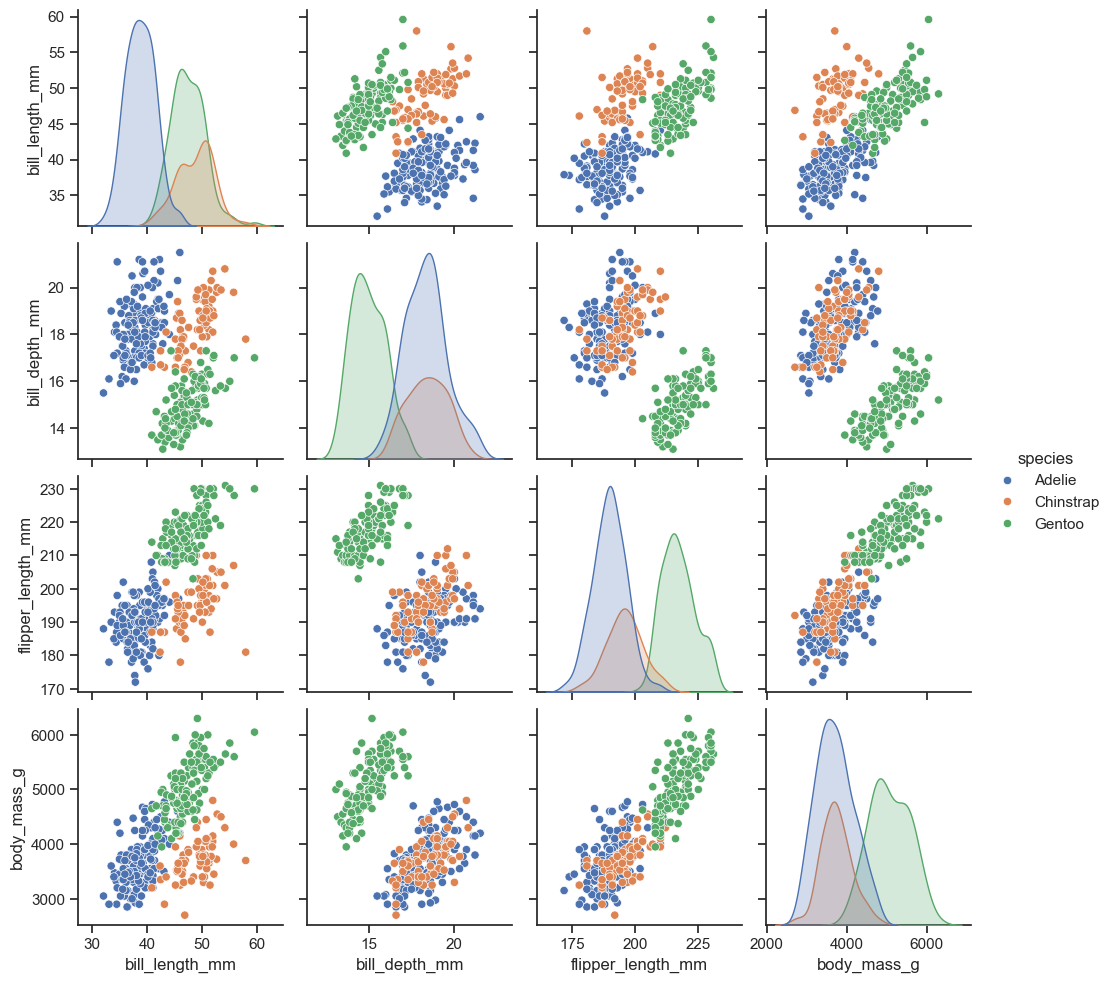

In [170]:
import seaborn as sns
sns.set_theme(style="ticks")
 
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")